<h1 align='center' style='color:purple'>Clustering With K Means</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_excel('income.xlsx')
df.head()

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


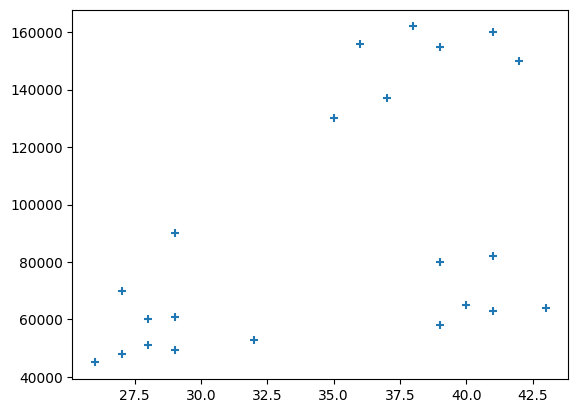

In [4]:
plt.scatter(df.Age,df.Income,marker='+')

In [5]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['Age','Income']])
y_predicted

array([1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2])

In [7]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income,cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,0


In [8]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]

In [9]:
df0.head()

,Name,Age,Income,cluster
4,Kory,42,150000,0
5,Gautam,39,155000,0
6,David,41,160000,0
7,Andrea,38,162000,0
8,Brad,36,156000,0


In [10]:
df1.head()

,Name,Age,Income,cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
19,Alia,39,80000,1
20,Sid,41,82000,1


In [11]:
df2.head()

,Name,Age,Income,cluster
2,Mohan,29,61000,2
3,Ismail,28,60000,2
11,Tom,26,45000,2
12,Arnold,27,48000,2
13,Jared,28,51000,2


Text(0, 0.5, 'Income')

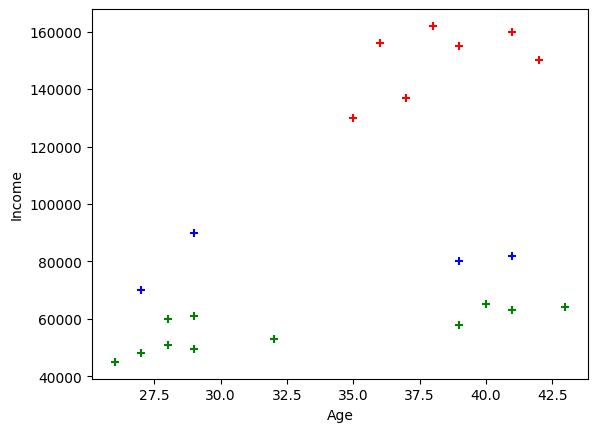

In [12]:
plt.scatter(df0.Age,df0.Income,marker='+',color='red')
plt.scatter(df1.Age,df1.Income,marker='+',color='blue')
plt.scatter(df2.Age,df2.Income,marker='+',color='green')
plt.xlabel('Age')
plt.ylabel('Income')

<h4 style='color:purple'>Preprocessing using min max scaler</h4>

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df[['Age']])
df['Age']=scaler.transform(df[['Age']])

scaler.fit(df[['Income']])
df['Income']=scaler.transform(df[['Income']])

df.head()

,Name,Age,Income,cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,0


In [16]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['Age','Income']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [17]:
df['cluster']=y_predicted

In [18]:
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [19]:
df.head()

,Name,Age,Income,cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [20]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]

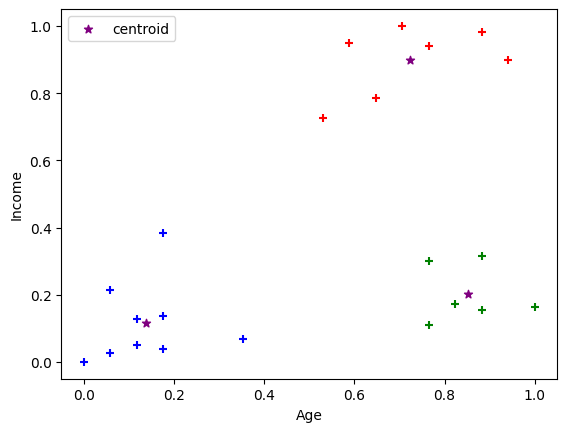

In [22]:
plt.scatter(df0.Age,df0.Income,marker='+',color='red')
plt.scatter(df1.Age,df1.Income,marker='+',color='blue')
plt.scatter(df2.Age,df2.Income,marker='+',color='green')
plt.xlabel('Age')
plt.ylabel('Income')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

<h4 style='color:purple'>Elbow Plot</h4>

In [24]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income']])
    sse.append(km.inertia_)

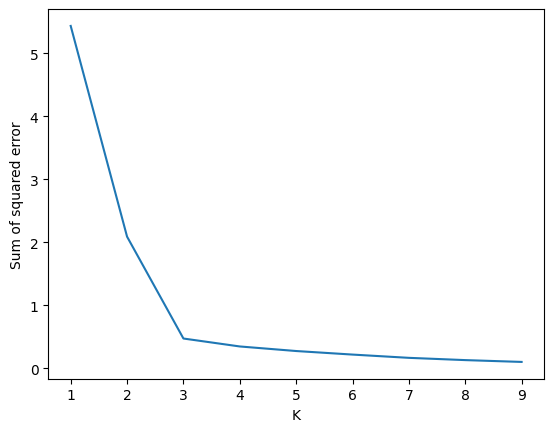

In [25]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)